<a href="https://colab.research.google.com/github/hippo2311/Stock-Prediction-LSTM/blob/main/Stock_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install yfinance


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Fetching the data from Yahoo Finance using yfinance
df = yf.download('AAPL', start='2012-01-01', end='2024-05-05')


df



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433823,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751304,394024400
...,...,...,...,...,...,...
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.500000,68169400
2024-04-30,173.330002,174.990005,170.000000,170.330002,170.330002,65934800
2024-05-01,169.580002,172.710007,169.110001,169.300003,169.300003,50383100


In [ ]:
df.shape

(3104, 6)

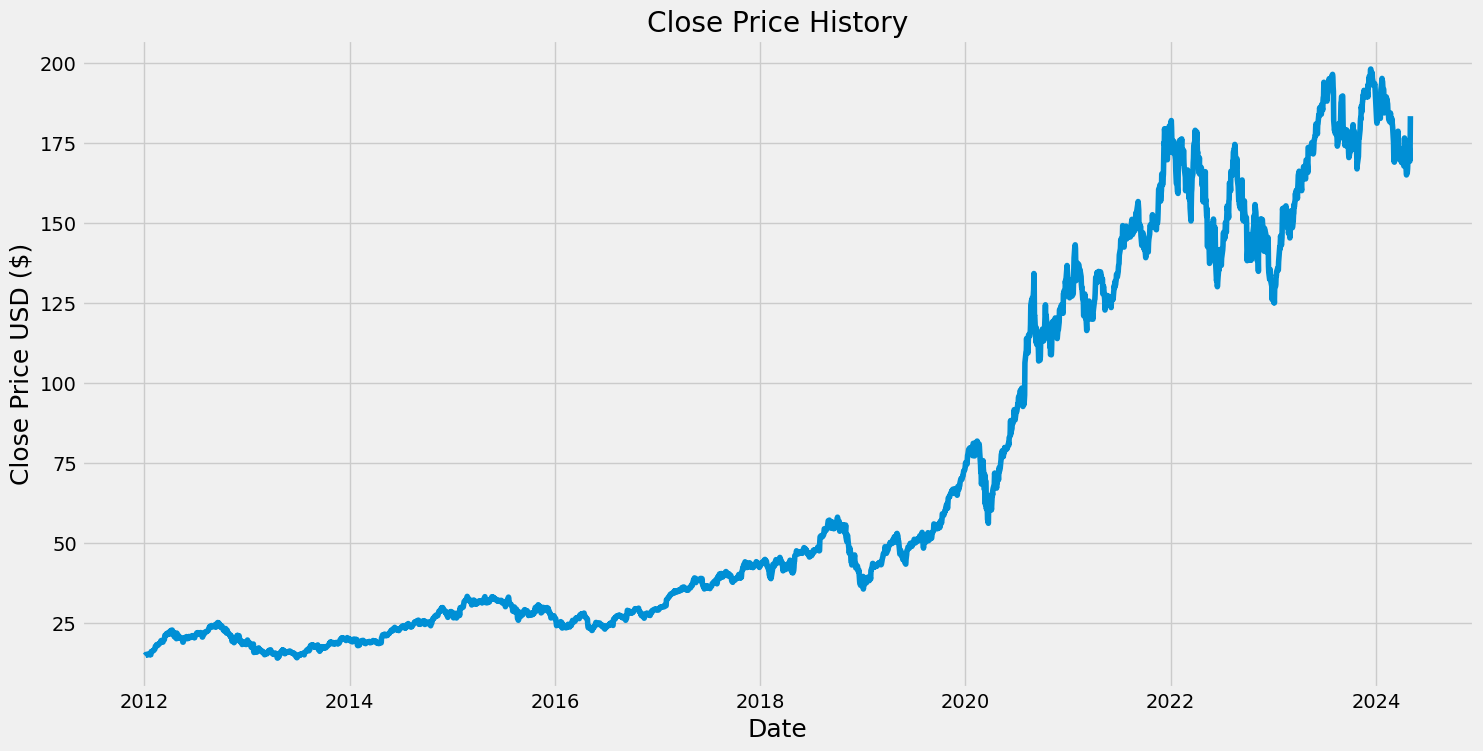

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a newdatafram with nly the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

2484

In [ ]:
#Scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84356209],
       [0.86381591],
       [0.92001631]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data  = scaled_data[0:training_data_len , :]
#Split tge data to x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()


[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]



In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape the data
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2424, 60, 1)

In [ ]:
#build lstm
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#train_model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2424/2424 [==============================] - 97s 37ms/step - loss: 8.0474e-04


In [ ]:
#create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test =  dataset[training_data_len : , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 0s 20ms/step


In [ ]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14.80015723045409

In [ ]:
#plot the data

<ipython-input-33-0568cf38a636>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


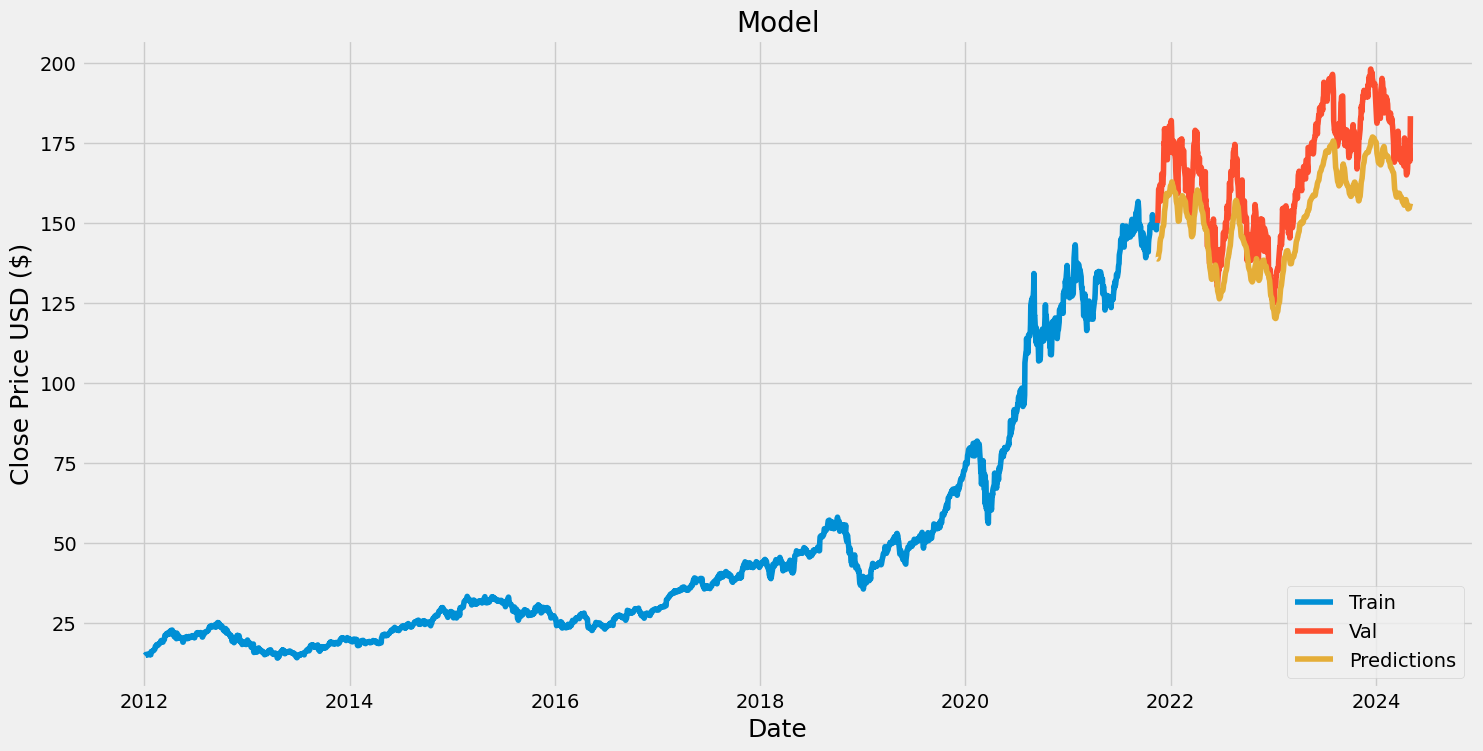

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid price and predicted price
valid

,Close,Predictions
Date,,
2021-11-15,150.000000,138.782944
2021-11-16,151.000000,138.733780
2021-11-17,153.490005,138.828674
2021-11-18,157.869995,139.213730
2021-11-19,160.550003,140.099167
...,...,...
2024-04-29,173.500000,154.603821
2024-04-30,170.330002,155.149567
2024-05-01,169.300003,155.508896


In [ ]:
# Fetch the stock data
apple_quote = yf.download('AAPL', start='2012-01-01', end='2024-05-05')

# Create a new DataFrame with only the 'Close' column
new_df = apple_quote.filter(['Close'])

# Get the last 60 days of closing price values and convert the DataFrame to a numpy array
last_60_days = new_df[-60:].values

# Initialize the scaler (assuming MinMaxScaler is already fitted on training data)
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data to be in the range 0 to 1
# Note: This should normally use the scaler that was fit on your training data
last_60_days_scaled = scaler.fit_transform(last_60_days)

# Prepare the test dataset
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the price using the model
pred_price = model.predict(X_test)

# Undo the scaling to get the actual price
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 48ms/step
[[171.12717]]


In [ ]:
apple_quote2 = yf.download('AAPL', start='2024-05-06', end='2024-05-07')

# Check if data is available and print the closing price
if not apple_quote2.empty:
    print(apple_quote2['Close'])
else:
    print("No data available for the specified date.")

[*********************100%%**********************]  1 of 1 completed

Date
2024-05-06    181.710007
Name: Close, dtype: float64
